In [1]:
from functools import partial
import matplotlib.pyplot as plt
import multiprocessing as mp
import numpy as np
import os
import pandas as pd
import pickle
import re
# import seaborn as sns
# import scipy

In [2]:
products_df_preview = pd.read_csv('en.openfoodfacts.org.products.csv', delimiter='\t',
                          encoding='utf-8', low_memory=False, nrows=10,
                          dtype={"code":"string"})
with pd.option_context('display.max_columns', None):
    display(products_df_preview[['code', 'product_name', 'brands', 'categories_en', 'pnns_groups_1', 'pnns_groups_2',
                                 'food_groups_en', 'main_category_en', 'energy_100g', 'energy-kj_100g', 'energy-kcal_100g',
                                 'proteins_100g', 'carbohydrates_100g', 'sugars_100g', 'starch_100g', 'fat_100g', 'saturated-fat_100g',
                                 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g',
                                 'trans-fat_100g', 'fiber_100g', 'sodium_100g', 'alcohol_100g', 'glycemic-index_100g']])

,code,product_name,brands,categories_en,pnns_groups_1,pnns_groups_2,food_groups_en,main_category_en,energy_100g,energy-kj_100g,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,starch_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,trans-fat_100g,fiber_100g,sodium_100g,alcohol_100g,glycemic-index_100g
0,00000000000000225,jeunes pousses,endives,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,Andrè,NaN,NaN,unknown,unknown,NaN,NaN,690.0,NaN,165.0,1.5,65.0,12.60,NaN,2.0,2.00,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2,00000000000003429145,L.casei,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,2.7,9.8,9.80,NaN,1.4,0.90,NaN,NaN,NaN,NaN,NaN,NaN,0.040,NaN,NaN
3,00000000000026772226,Skyr,Danone,"Dairies,Desserts,Fermented foods,Fermented mil...",Milk and dairy products,Dairy desserts,"Milk and dairy products,Dairy desserts",Skyr,238.0,NaN,57.0,10.0,3.9,3.90,NaN,0.2,0.10,NaN,NaN,NaN,NaN,NaN,NaN,0.036,NaN,NaN
4,0000000000017,Vitória crackers,NaN,NaN,unknown,unknown,NaN,NaN,1569.0,NaN,375.0,7.8,70.1,15.00,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,0.560,NaN,NaN
5,0000000000031,Cacao,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,000000000003327986,Filetes de pollo empanado,NaN,NaN,unknown,unknown,NaN,NaN,685.8,685.8,163.9,15.3,NaN,NaN,NaN,1.9,1.00,NaN,NaN,NaN,NaN,NaN,NaN,0.440,NaN,NaN
7,000000000004128579,Burger Meat Pollo,NaN,NaN,unknown,unknown,NaN,NaN,812.0,NaN,194.0,18.0,5.7,0.05,NaN,11.0,3.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,000000000004622327,Hamburguesas de ternera 100%,NaN,NaN,unknown,unknown,NaN,NaN,3661.0,NaN,874.9,15.7,2.6,1.00,NaN,15.1,6.10,NaN,NaN,NaN,NaN,NaN,NaN,0.840,NaN,NaN
9,00000000001,hyde icon,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
for index, row in products_df_preview.iterrows():
    kj = row['energy-kj_100g']
    kj_to_kcal = 0      
    if np.isnan(kj):
        kj = row['energy_100g']
    if np.isnan(kj):
        kj = 0
    else:
        kj_to_kcal = kj * 0.239006
    kcal = row['energy-kcal_100g']
    if np.isnan(kcal):
        kcal = 0
    kc = row['energy-kcal_100g']
    fat = row['fat_100g']
    carbs = row['carbohydrates_100g']
    fiber = row['fiber_100g']
    protein = row['proteins_100g']
    alcohol = row['alcohol_100g']
    fat_cal = 0
    carb_cal = 0
    fiber_cal = 0
    prot_cal = 0
    alc_cal = 0
    missing = ""
    if not np.isnan(fat):
        fat_cal = 9 * fat
    else:
        missing += "Fat "
    if not np.isnan(carbs):
        carb_cal = 4 * carbs
    else:
        missing += "Carbs "
    if not np.isnan(fiber):
        fiber_cal = 2 * carbs
    else:
        missing += "Fiber "
    if not np.isnan(protein):
        prot_cal = 4 * protein
    else:
        missing += "Protein "
    if not np.isnan(alcohol):
        alc_cal = 7 * alcohol
    else:
        missing += "Alcohol "
    estim_kcal = fat_cal + carb_cal + fiber_cal + prot_cal + alc_cal
    print(f"Stated kJ: {kj}\nkJ to kcal: {kj_to_kcal}\nStated kcal: {kcal}\nEstimated kcal: {estim_kcal}\nMissing: {missing}\n")

Stated kJ: 0
kJ to kcal: 0
Stated kcal: 0
Estimated kcal: 0
Missing: Fat Carbs Fiber Protein Alcohol 

Stated kJ: 690.0
kJ to kcal: 164.91414
Stated kcal: 165.0
Estimated kcal: 414.0
Missing: Alcohol 

Stated kJ: 0
kJ to kcal: 0
Stated kcal: 0
Estimated kcal: 62.60000000000001
Missing: Fiber Alcohol 

Stated kJ: 238.0
kJ to kcal: 56.883428
Stated kcal: 57.0
Estimated kcal: 57.4
Missing: Fiber Alcohol 

Stated kJ: 1569.0
kJ to kcal: 375.000414
Stated kcal: 375.0
Estimated kcal: 374.59999999999997
Missing: Fiber Alcohol 

Stated kJ: 0
kJ to kcal: 0
Stated kcal: 0
Estimated kcal: 0
Missing: Fat Carbs Fiber Protein Alcohol 

Stated kJ: 685.8
kJ to kcal: 163.91031479999998
Stated kcal: 163.9
Estimated kcal: 78.3
Missing: Carbs Fiber Alcohol 

Stated kJ: 812.0
kJ to kcal: 194.072872
Stated kcal: 194.0
Estimated kcal: 193.8
Missing: Fiber Alcohol 

Stated kJ: 3661.0
kJ to kcal: 875.000966
Stated kcal: 874.9
Estimated kcal: 209.10000000000002
Missing: Fiber Alcohol 

Stated kJ: 0
kJ to kcal: 0

present filter after removing superfluous rows

In [4]:
products_df = pd.DataFrame()

if not os.path.isfile('products_df.ftr'):
    chunksize = 10 ** 5
    with pd.read_csv('en.openfoodfacts.org.products.csv', delimiter='\t', encoding='utf-8', low_memory=False, chunksize=chunksize,
                    dtype={"code":"string"}) as reader:
        for chunk in reader:
            chunk.dropna(subset=['categories_en', 'fat_100g', 'carbohydrates_100g', 'proteins_100g'], inplace=True)
            chunk.dropna(subset=['energy-kj_100g', 'energy-kcal_100g', 'energy_100g'], how='all', inplace=True)
            chunk = chunk[['code', 'product_name', 'brands', 'categories_en', 'pnns_groups_1', 'pnns_groups_2', 'food_groups_en',
                           'main_category_en', 'energy_100g', 'energy-kj_100g', 'energy-kcal_100g', 'proteins_100g', 'carbohydrates_100g',
                           'sugars_100g', 'starch_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g',
                           'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g', 'trans-fat_100g', 'fiber_100g',
                           'sodium_100g', 'alcohol_100g', 'glycemic-index_100g']]
            products_df = pd.concat([products_df, chunk])
    products_df.reset_index(drop=True, inplace=True)
    products_df.to_feather('products_df.ftr')
else:
    products_df = pd.read_feather('products_df.ftr')


In [5]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904870 entries, 0 to 904869
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   code                      904870 non-null  string 
 1   product_name              901503 non-null  object 
 2   brands                    645608 non-null  object 
 3   categories_en             904870 non-null  object 
 4   pnns_groups_1             904870 non-null  object 
 5   pnns_groups_2             904870 non-null  object 
 6   food_groups_en            743353 non-null  object 
 7   main_category_en          904870 non-null  object 
 8   energy_100g               904870 non-null  float64
 9   energy-kj_100g            159551 non-null  float64
 10  energy-kcal_100g          864689 non-null  float64
 11  proteins_100g             904870 non-null  float64
 12  carbohydrates_100g        904870 non-null  float64
 13  sugars_100g               886136 non-null  f

In [6]:
products_df.drop('glycemic-index_100g', axis=1, inplace=True)

In [7]:
if not os.path.isfile('products_df2.ftr'):
    def check_invalid_fats_carbs(row):
        reconst_fat = row['saturated-fat_100g'] if not np.isnan(row['saturated-fat_100g']) else 0 + \
                    row['monounsaturated-fat_100g'] if not np.isnan(row['monounsaturated-fat_100g']) else 0 + \
                    row['polyunsaturated-fat_100g'] if not np.isnan(row['polyunsaturated-fat_100g']) else 0 + \
                    row['trans-fat_100g'] if not np.isnan(row['trans-fat_100g']) else 0
        reconst_carbs = row['sugars_100g'] if not np.isnan(row['sugars_100g']) else 0 + \
                        row['starch_100g'] if not np.isnan(row['starch_100g']) else 0
        return reconst_fat > row['fat_100g'] or reconst_carbs > row['carbohydrates_100g']

    products_df.drop(products_df.index[list(np.where(products_df.apply(check_invalid_fats_carbs, axis=1))[0])], inplace=True)
    products_df.reset_index(drop=True, inplace=True)
    products_df.to_feather('products_df2.ftr')
else:
    products_df = pd.read_feather('products_df2.ftr')
    
products_df.shape

(903224, 25)

In [45]:
old_kj_nans = old_kcal_nans = old_ener_nans = new_kj_nans = new_kcal_nans = new_ener_nans = 0

if not os.path.isfile('products_df3.ftr') or not os.path.isfile('ener_nans.pkl'):
    def check_invalid_macros(row):
        # comparison to NaN always False (preserves rows with NaN values)
        # water has 0 calories, so 0 is always valid
        return (
            # 100 g : cooking oil
            row['fat_100g'] < 0 or row['fat_100g'] > 100 or
            # 100 g : refined sugar
            row['carbohydrates_100g'] < 0 or row['carbohydrates_100g'] > 100 or
            # 79 g : whey protein powder
            row['proteins_100g'] < 0 or row['proteins_100g'] >= 79.5 or
            # 75 g : wheat dextrin (fiber) supplement
            row['fiber_100g'] < 0 or row['fiber_100g'] >= 75.5 or
            # 95 g : rectified grain spirit
            row['alcohol_100g'] < 0 or row['alcohol_100g'] >= 95.5)

    products_df.drop(products_df.index[list(np.where(products_df.apply(check_invalid_macros, axis=1))[0])], inplace=True)
    products_df.reset_index(drop=True, inplace=True)
    products_df.to_feather('products_df3.ftr')

    old_kj_nans = products_df['energy-kj_100g'].isna().sum()
    old_kcal_nans = products_df['energy-kcal_100g'].isna().sum()
    old_ener_nans = products_df['energy_100g'].isna().sum()
    products_df.mask(products_df['energy-kj_100g'] < 0, np.nan, inplace=True)
    products_df.mask(products_df['energy-kcal_100g'] < 0, np.nan, inplace=True)
    products_df.mask(products_df['energy_100g'] < 0, np.nan, inplace=True)
    products_df.dropna(subset=['energy-kj_100g', 'energy-kcal_100g', 'energy_100g'], how='all', inplace=True)
    new_kj_nans = products_df['energy-kj_100g'].isna().sum() - old_kj_nans
    new_kcal_nans = products_df['energy-kcal_100g'].isna().sum() - old_kcal_nans
    new_ener_nans = products_df['energy_100g'].isna().sum() - old_ener_nans
    
    with open('ener_nans.pkl', 'wb') as f:
        pickle.dump([old_kj_nans, old_kcal_nans, old_ener_nans, new_kj_nans, new_kcal_nans, new_ener_nans], f)
else:
    products_df = pd.read_feather('products_df3.ftr')
    with open('ener_nans.pkl', 'rb') as f:
        old_kj_nans, old_kcal_nans, old_ener_nans, new_kj_nans, new_kcal_nans, new_ener_nans = pickle.load(f)

products_df.shape

(901924, 25)

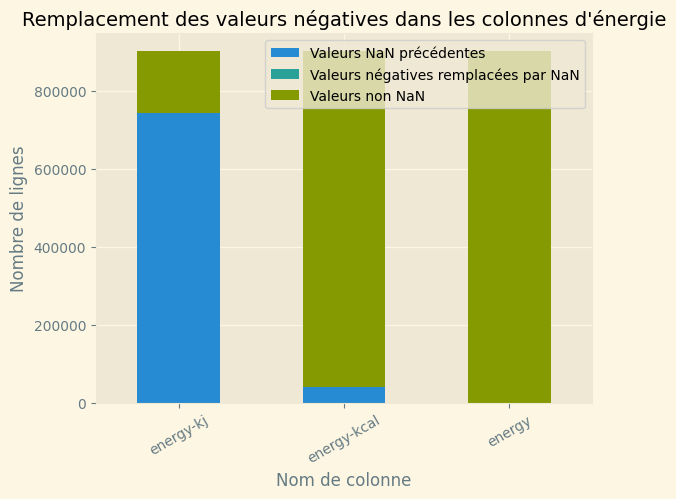

In [46]:
ener_nans_df = pd.DataFrame({
    'col': ['energy-kj', 'energy-kcal', 'energy'],
    'Valeurs NaN précédentes': [old_kj_nans, old_kcal_nans, old_ener_nans],
    'Valeurs négatives remplacées par NaN': [new_kj_nans, new_kcal_nans, new_ener_nans],
    'Valeurs non NaN': [products_df.shape[0] - old_kj_nans - new_kj_nans,
                        products_df.shape[0] - old_kcal_nans - new_kcal_nans,
                        products_df.shape[0] - old_ener_nans - new_ener_nans]})
plt.style.use('Solarize_Light2')
ener_nans_df.set_index('col').plot(kind='bar', stacked=True)
plt.title("Remplacement des valeurs négatives dans les colonnes d'énergie", fontsize=14)
plt.xlabel('Nom de colonne')
plt.ylabel('Nombre de lignes')
plt.xticks(rotation=30)
plt.show()

In [10]:
if not os.path.isfile('products_df4.ftr') or not os.path.isfile('kcal_vals.pkl'):
    kcal_vals = {
        'orig_total_rows': products_df.shape[0],
        'orig_kcal': products_df['energy-kcal_100g'].notnull().sum(),
        'kcal_from_ener': 0,
        'remain_orig_kcal': 0,
        'kcal_from_kj': 0
    }

    # caloric conversions taken from:
    # Eugénie Auvinet, Caroline Hirschauer et Anne-Laure Meunier, 
    # Alimentations, Nutrition et Régimes, Connaissances . Outils . Applications, Studyrama, 2018, 1134 p.
    # and
    # REGULATION (EU) No 1169/2011 OF THE EUROPEAN PARLIAMENT AND OF THE COUNCIL

    # error margin taken from:
    # FOOD AND AGRICULTURE ORGANIZATION OF THE UNITED NATIONS FOOD AND NUTRITION PAPER 77
    # Food energy - methods of analysis and conversion factors
    # Report of a Technical Workshop, Rome, 3-6 December 2002

    def correct_kcal(row):
        corr_kcal = np.nan
        # energy always present and should be given in kJ
        kcal_from_ener = row['energy_100g'] * 0.239
        kcal_stated = row['energy-kcal_100g'] if not np.isnan(row['energy-kcal_100g']) else 0
        kcal_from_kj = (row['energy-kj_100g'] if not np.isnan(row['energy-kj_100g']) else 0) * 0.239
        # fat, protein and carbohydrates always present
        kcal_reconst = (
            # 9 kcal per gram fat (always present)
            row['fat_100g'] * 8.9913958 +
            # 7 kcal per gram alcohol
            (row['alcohol_100g'] if not np.isnan(row['alcohol_100g']) else 0) * 6.9933078 +
            # 4 kcal per gram protein (always present)
            row['proteins_100g'] * 3.9961759 +
            # 4 kcal per gram carbohydrates (always present)
            row['carbohydrates_100g'] * 3.9961759 +
            # 2 kcal per gram fiber
            (row['fiber_100g'] if not np.isnan(row['fiber_100g']) else 0) * 1.91205)
        # if the difference between the stated energy and reconstructed energy match within the
        # error margin then stated energy is deemed valid
        err_mar = kcal_reconst * 0.06
        if abs(kcal_from_ener - kcal_reconst) <= err_mar:
            corr_kcal = round(kcal_from_ener)
            kcal_vals['kcal_from_ener'] += 1
        # comparison to stated kcal
        elif abs(kcal_stated - kcal_reconst) <= err_mar:
            corr_kcal = kcal_stated
            kcal_vals['remain_orig_kcal'] += 1
        # comparison to stated kJ
        elif abs(kcal_from_kj - kcal_reconst) <= err_mar:
            corr_kcal = round(kcal_from_kj)
            kcal_vals['kcal_from_kj'] += 1
        # if none of the stated energy values match the reconstructed value from macronutrients the corrected kcal stays NaN
        return corr_kcal

    products_df['energy-kcal_100g'] = products_df.apply(correct_kcal, axis=1)
    products_df.dropna(subset=['energy-kcal_100g'], inplace=True)
    products_df.drop(['energy-kj_100g', 'energy_100g'], axis=1, inplace=True)
    products_df.reset_index(drop=True, inplace=True)
    products_df.to_feather('products_df4.ftr')
    with open('kcal_vals.pkl', 'wb') as f:
        pickle.dump(kcal_vals, f)
else:
    products_df = pd.read_feather('products_df4.ftr')
    with open('kcal_vals.pkl', 'rb') as f:
        kcal_vals = pickle.load(f)

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701786 entries, 0 to 701785
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   code                      701786 non-null  string 
 1   product_name              698951 non-null  object 
 2   brands                    512158 non-null  object 
 3   categories_en             701786 non-null  object 
 4   pnns_groups_1             701786 non-null  object 
 5   pnns_groups_2             701786 non-null  object 
 6   food_groups_en            591550 non-null  object 
 7   main_category_en          701786 non-null  object 
 8   energy-kcal_100g          701786 non-null  float64
 9   proteins_100g             701786 non-null  float64
 10  carbohydrates_100g        701786 non-null  float64
 11  sugars_100g               687203 non-null  float64
 12  starch_100g               492 non-null     float64
 13  fat_100g                  701786 non-null  f

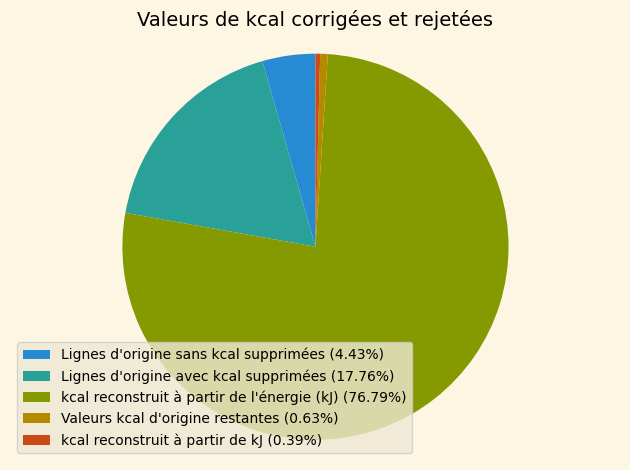

In [11]:
kcal_from_ener = kcal_vals['kcal_from_ener']
remain_orig_kcal = kcal_vals['remain_orig_kcal']
kcal_from_kj = kcal_vals['kcal_from_kj']
orig_kcal_dropped = kcal_vals['orig_kcal'] - (kcal_from_ener + remain_orig_kcal + kcal_from_kj)
orig_row_wo_kcal_dropped = kcal_vals['orig_total_rows'] - kcal_vals['orig_kcal']
patches, texts = plt.pie([orig_row_wo_kcal_dropped, orig_kcal_dropped, kcal_from_ener, remain_orig_kcal, kcal_from_kj], startangle=90)
plt.legend(patches, [f"Lignes d'origine sans kcal supprimées ({round(orig_row_wo_kcal_dropped / kcal_vals['orig_total_rows'] * 100, 2)}%)",
                     f"Lignes d'origine avec kcal supprimées ({round(orig_kcal_dropped / kcal_vals['orig_total_rows'] * 100, 2)}%)",
                     f"kcal reconstruit à partir de l'énergie (kJ) ({round(kcal_from_ener / kcal_vals['orig_total_rows'] * 100, 2)}%)",
                     f"Valeurs kcal d'origine restantes ({round(remain_orig_kcal / kcal_vals['orig_total_rows'] * 100, 2)}%)",
                     f"kcal reconstruit à partir de kJ ({round(kcal_from_kj / kcal_vals['orig_total_rows'] * 100, 2)}%)"],
                     loc="best")
plt.title("Valeurs de kcal corrigées et rejetées", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [12]:
products_df.drop(['pnns_groups_1', 'pnns_groups_2', 'food_groups_en',
                  'starch_100g', 'omega-3-fat_100g', 'omega-6-fat_100g'
                 ], axis=1, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701786 entries, 0 to 701785
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   code                      701786 non-null  string 
 1   product_name              698951 non-null  object 
 2   brands                    512158 non-null  object 
 3   categories_en             701786 non-null  object 
 4   main_category_en          701786 non-null  object 
 5   energy-kcal_100g          701786 non-null  float64
 6   proteins_100g             701786 non-null  float64
 7   carbohydrates_100g        701786 non-null  float64
 8   sugars_100g               687203 non-null  float64
 9   fat_100g                  701786 non-null  float64
 10  saturated-fat_100g        677060 non-null  float64
 11  monounsaturated-fat_100g  32639 non-null   float64
 12  polyunsaturated-fat_100g  32609 non-null   float64
 13  trans-fat_100g            163305 non-null  f

In [13]:
products_df.insert(5, 'primary_category', '')
products_df.insert(6, 'secondary_category', '')
products_df.insert(7, 'tertiary_category', '')

# string contains hypens and no spaces or starts with language code (applies almost exclusively to non-english categories)
inval_categ_regex = re.compile(r"(?=^.*-.*$)^\S*$|^\w\w:.*$")

def clean_categs(row):
    new_categs = []
    for i in reversed(row['categories_en'].split(',')):
        if not re.match(inval_categ_regex, i):
            new_categs += [i]
        if len(new_categs) == 3:
            break
    for i in range(len(new_categs)):
        if i == 0:
            row['primary_category'] = new_categs[i]
        elif i == 1:
            row['secondary_category'] = new_categs[i]
        else:
            row['tertiary_category'] = new_categs[i]
    return row

products_df = products_df.apply(clean_categs, axis=1)
products_df.drop(['categories_en'], axis=1, inplace=True)
products_df.drop(['main_category_en'], axis=1, inplace=True)

pd.set_option('display.max_colwidth', None)
products_df.head()

,code,product_name,brands,primary_category,secondary_category,tertiary_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,fiber_100g,sodium_100g,alcohol_100g
0,00000000000026772226,Skyr,Danone,Skyr,Cream cheeses,Dairy desserts,57.0,10.0,3.9,3.9,0.2,0.1,NaN,NaN,NaN,NaN,0.036,NaN
1,0000000001885,Compote de poire,Crous,Pear compotes,Compotes,Fruits based foods,157.0,0.6,36.0,27.0,0.0,0.0,NaN,NaN,NaN,3.6,0.000,NaN
2,0000000002257,Salade de macedoine de légumes,None,Vegetables macedoines,Cold starters,Starters,143.0,1.9,3.9,1.0,12.7,1.0,NaN,NaN,NaN,NaN,0.108,NaN
3,0000000005005,Abondance,None,Abondance,French cheeses,Cheeses,397.0,25.0,0.1,0.1,33.0,21.6,NaN,NaN,NaN,NaN,0.520,NaN
4,0000000005166,cuisse de poulet direct au four curry,None,Chicken thighs,Chickens,Poultries,197.0,17.0,3.0,0.9,13.0,4.0,NaN,NaN,NaN,NaN,0.440,NaN


In [14]:
pri_categ_top_counts = products_df['primary_category'].value_counts().take(list(range(250)))
sec_categ_top_counts = products_df['secondary_category'].value_counts().take(list(range(250)))
# ter_categ_top_counts = products_df['tertiary_category'].value_counts().take(list(range(200)))
# all_categ_top_counts = pd.concat([pri_categ_top_counts, sec_categ_top_counts, ter_categ_top_counts])
all_categ_top_counts = pd.concat([pri_categ_top_counts, sec_categ_top_counts])
all_categ_uniq_top_counts = pd.Series(0, index=list(set(all_categ_top_counts.index)))
for index, value in all_categ_top_counts.items():
    all_categ_uniq_top_counts[index] += value
all_categ_uniq_top_counts.sort_values(ascending=False, inplace=True)
print(all_categ_uniq_top_counts.index.to_list())

['', 'Biscuits and cakes', 'Sauces', 'Snacks', 'Biscuits', 'Confectioneries', 'Fermented milk products', 'Cheeses', 'Beverages', 'Frozen foods', 'Groceries', 'Cereals and their products', 'Sweet snacks', 'Breads', 'Cereals and potatoes', 'Prepared meats', 'Yogurts', 'Meals', 'Cakes', 'Meats', 'Pastas', 'Chocolates', 'Frozen desserts', 'Chocolate candies', 'Plant-based beverages', 'Hams', 'Plant-based foods', 'Pastries', 'Milks', 'Dairies', 'Virgin olive oils', 'Extra-virgin olive oils', 'Sausages', 'Sweetened beverages', 'Chickens', 'Condiments', 'Candies', 'Dark chocolates', 'Sodas', 'White hams', 'Vegetable oils', 'Crisps', 'Jams', 'Pizzas', 'Breakfast cereals', 'Waters', 'Cured sausages', 'Ice creams', 'French cheeses', 'Fruit juices', 'Carbonated drinks', 'Nuts', 'Pizzas pies and quiches', 'Bonbons', 'Sweet spreads', 'Dried fruits', 'Vegetable fats', 'Brioches', 'Berry jams', 'Fruits based foods', 'Poultries', 'Pork', 'Tomato sauces', 'Rices', 'Crackers', 'Fishes', 'Appetizers', 'I

In [15]:
selected_categs = ['Biscuits', 'Cheeses', 'Sweet snacks', 'Breads', 'Cakes', 'Chocolates', 'Hams', 'Pastries', 'Milks',
                   'Sausages', 'Chickens', 'Candies', 'Sodas', 'Vegetable oils', 'Jams', 'Pizzas', 'Breakfast cereals',
                   'Waters', 'Ice creams', 'Fruit juices', 'Nuts', 'Sweet spreads', 'Dried fruits', 'Pork', 'Tomato sauces',
                   'Rices', 'Appetizers', 'Soups', 'Seafood', 'Smoked salmons', 'Mayonnaises', 'Salty snacks', 'Sandwiches',
                   'Ice creams and sorbets', 'Fruit yogurts', 'Noodles', 'Meat analogues', 'Microwave meals', 'Prepared salads',
                   'Butters', 'Pasta dishes', 'Smoked fishes', 'Cream cheeses', 'Dips', 'Frozen seafood', 'Canned meals',
                   'Tunas', 'Dry pastas', 'Mustards', 'Pestos']
products_df = pd.concat([products_df, pd.DataFrame(False, index=list(range(len(products_df.index))), columns=selected_categs)], axis=1)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701786 entries, 0 to 701785
Data columns (total 68 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   code                      701786 non-null  object 
 1   product_name              698951 non-null  object 
 2   brands                    512158 non-null  object 
 3   primary_category          701786 non-null  object 
 4   secondary_category        701786 non-null  object 
 5   tertiary_category         701786 non-null  object 
 6   energy-kcal_100g          701786 non-null  float64
 7   proteins_100g             701786 non-null  float64
 8   carbohydrates_100g        701786 non-null  float64
 9   sugars_100g               687203 non-null  float64
 10  fat_100g                  701786 non-null  float64
 11  saturated-fat_100g        677060 non-null  float64
 12  monounsaturated-fat_100g  32639 non-null   float64
 13  polyunsaturated-fat_100g  32609 non-null   f

In [16]:
if not os.path.isfile('products_df5.ftr'):
    def one_hot_categ(row, categ):
        if row['primary_category'] == categ or row['secondary_category'] == categ or row['tertiary_category'] == categ:
            row[categ] = True
        return row

    def apply_ohc(categs, working_df):
        for categ in categs:
            working_df = working_df.apply(one_hot_categ, args=(categ,), axis=1)
        return working_df

    # does not work on single core single thread machines
    workers = int(mp.cpu_count() * 0.75)
    products_df_chunks = np.array_split(products_df, workers)
    with mp.Pool(workers) as pool:
        products_df = pd.concat(pool.map(partial(apply_ohc, selected_categs), products_df_chunks))
    products_df.to_feather('products_df5.ftr')
else:
    products_df = pd.read_feather('products_df5.ftr')

with pd.option_context('display.max_columns', None):
    display(products_df)

,code,product_name,brands,primary_category,secondary_category,tertiary_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,fiber_100g,sodium_100g,alcohol_100g,Biscuits,Cheeses,Sweet snacks,Breads,Cakes,Chocolates,Hams,Pastries,Milks,Sausages,Chickens,Candies,Sodas,Vegetable oils,Jams,Pizzas,Breakfast cereals,Waters,Ice creams,Fruit juices,Nuts,Sweet spreads,Dried fruits,Pork,Tomato sauces,Rices,Appetizers,Soups,Seafood,Smoked salmons,Mayonnaises,Salty snacks,Sandwiches,Ice creams and sorbets,Fruit yogurts,Noodles,Meat analogues,Microwave meals,Prepared salads,Butters,Pasta dishes,Smoked fishes,Cream cheeses,Dips,Frozen seafood,Canned meals,Tunas,Dry pastas,Mustards,Pestos
0,00000000000026772226,Skyr,Danone,Skyr,Cream cheeses,Dairy desserts,57.0,10.0,3.9,3.9,0.2,0.1,NaN,NaN,NaN,NaN,0.036,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0000000001885,Compote de poire,Crous,Pear compotes,Compotes,Fruits based foods,157.0,0.6,36.0,27.0,0.0,0.0,NaN,NaN,NaN,3.6,0.000,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0000000002257,Salade de macedoine de légumes,None,Vegetables macedoines,Cold starters,Starters,143.0,1.9,3.9,1.0,12.7,1.0,NaN,NaN,NaN,NaN,0.108,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0000000005005,Abondance,None,Abondance,French cheeses,Cheeses,397.0,25.0,0.1,0.1,33.0,21.6,NaN,NaN,NaN,NaN,0.520,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0000000005166,cuisse de poulet direct au four curry,None,Chicken thighs,Chickens,Poultries,197.0,17.0,3.0,0.9,13.0,4.0,NaN,NaN,NaN,NaN,0.440,NaN,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701781,9999991042742,Mousse au chocolat noir,None,Chocolate mousses,Chocolate desserts,Desserts,346.0,6.0,19.0,18.0,27.0,17.0,NaN,NaN,NaN,NaN,0.076,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
701782,9999991149090,Riz parfumé,King Elephant,Aromatic rices,Rices,Cereal grains,351.0,7.0,80.0,0.0,0.5,0.0,NaN,NaN,NaN,NaN,0.000,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,Fa

In [17]:
nutri_facts_to_fill = ['sugars_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
                       'trans-fat_100g', 'fiber_100g', 'sodium_100g', 'alcohol_100g']
nutri_facts_old_new = {}

for nutri_fact in nutri_facts_to_fill:
    nutri_facts_old_new[nutri_fact] = [0, 0]

if not os.path.isfile('products_df6.ftr') or not os.path.isfile('nutri_facts.pkl'):
    for nutri_fact in nutri_facts_to_fill:
        nutri_facts_old_new[nutri_fact][0] = products_df[nutri_fact].notnull().sum()

    for categ in selected_categs:
        products_df_for_categ = products_df.where(products_df[categ])
        for nutri_fact in nutri_facts_to_fill:
            nf_mean = round(products_df_for_categ[nutri_fact].mean(), 3)
            if not np.isnan(nf_mean):
                products_df.iloc[
                        products_df[products_df[categ] & np.isnan(products_df[nutri_fact])
                    ].index.tolist(), products_df.columns.get_loc(nutri_fact)] = nf_mean

    products_df.to_feather('products_df6.ftr')

    for nutri_fact in nutri_facts_to_fill:
        nutri_facts_old_new[nutri_fact][1] = products_df[nutri_fact].notnull().sum()

    with open('nutri_facts.pkl', 'wb') as f:
        pickle.dump(nutri_facts_old_new, f)
else:
    products_df = pd.read_feather('products_df6.ftr')
    with open('nutri_facts.pkl', 'rb') as f:
        nutri_facts_old_new = pickle.load(f)

with pd.option_context('display.max_columns', None):
    display(products_df)

,code,product_name,brands,primary_category,secondary_category,tertiary_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,fiber_100g,sodium_100g,alcohol_100g,Biscuits,Cheeses,Sweet snacks,Breads,Cakes,Chocolates,Hams,Pastries,Milks,Sausages,Chickens,Candies,Sodas,Vegetable oils,Jams,Pizzas,Breakfast cereals,Waters,Ice creams,Fruit juices,Nuts,Sweet spreads,Dried fruits,Pork,Tomato sauces,Rices,Appetizers,Soups,Seafood,Smoked salmons,Mayonnaises,Salty snacks,Sandwiches,Ice creams and sorbets,Fruit yogurts,Noodles,Meat analogues,Microwave meals,Prepared salads,Butters,Pasta dishes,Smoked fishes,Cream cheeses,Dips,Frozen seafood,Canned meals,Tunas,Dry pastas,Mustards,Pestos
0,00000000000026772226,Skyr,Danone,Skyr,Cream cheeses,Dairy desserts,57.0,10.0,3.9,3.9,0.2,0.1,6.052,0.849,0.064,0.202,0.036,0.017,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0000000001885,Compote de poire,Crous,Pear compotes,Compotes,Fruits based foods,157.0,0.6,36.0,27.0,0.0,0.0,NaN,NaN,NaN,3.600,0.000,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0000000002257,Salade de macedoine de légumes,None,Vegetables macedoines,Cold starters,Starters,143.0,1.9,3.9,1.0,12.7,1.0,NaN,NaN,NaN,NaN,0.108,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0000000005005,Abondance,None,Abondance,French cheeses,Cheeses,397.0,25.0,0.1,0.1,33.0,21.6,6.090,0.834,0.060,0.174,0.520,0.019,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0000000005166,cuisse de poulet direct au four curry,None,Chicken thighs,Chickens,Poultries,197.0,17.0,3.0,0.9,13.0,4.0,3.221,1.605,0.009,0.554,0.440,0.002,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701781,9999991042742,Mousse au chocolat noir,None,Chocolate mousses,Chocolate desserts,Desserts,346.0,6.0,19.0,18.0,27.0,17.0,NaN,NaN,NaN,NaN,0.076,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
701782,9999991149090,Riz parfumé,King Elephant,Aromatic rices,Rices,Cereal grains,351.0,7.0,80.0,0.0,0.5,0.0,0.564,0.519,0.002,2.149,0.000,0.000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

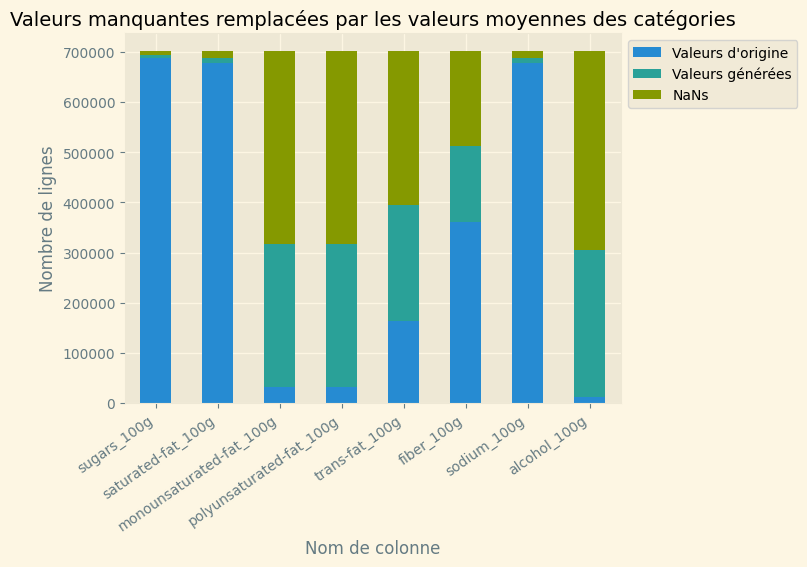

In [42]:
nutri_facts_df = pd.DataFrame({
    'col': nutri_facts_to_fill,
    "Valeurs d'origine": [nutri_facts_old_new[i][0] for i in nutri_facts_to_fill],
    'Valeurs générées': [nutri_facts_old_new[i][1] - nutri_facts_old_new[i][0] for i in nutri_facts_to_fill],
    'NaNs': [products_df.shape[0] - nutri_facts_old_new[i][1] for i in nutri_facts_to_fill]})
plt.style.use('Solarize_Light2')
nutri_facts_df.set_index('col').plot(kind='bar', stacked=True)
plt.title("Valeurs manquantes remplacées par les valeurs moyennes des catégories", fontsize=14)
plt.xlabel('Nom de colonne')
plt.ylabel('Nombre de lignes')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(horizontalalignment='right', rotation=35)
plt.show()